<a href="https://colab.research.google.com/github/girija2204/DLTopics/blob/master/gis_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install arcgis
!pip install geopandas
!apt-get install -y libspatialindex-dev
!pip install rtree

In [33]:
from google.colab import drive
drive.mount('/content/gdrive') # connects Colab to your Google Drive
root_path = '/content/gdrive/My Drive/Colab Notebooks' #

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, Point, MultiPolygon

In [50]:
puds_file = gpd.read_file(root_path+"/Planned_Unit_Development__PUDs_-shp/Planned_Unit_Development__PUDs_.shp")
housing = pd.read_csv(root_path+"/Affordable_Housing.csv")
crosswalk = pd.read_csv(root_path+"/zoning_crosswalk.csv")

In [36]:
puds_file.sample(5)

,OBJECTID,PUD_NAME,PUD_WEB_UR,PUD_CHANGE,PUD_ZONING,PUD_STATUS,PUD_CASE_N,GLOBALID,WARD,SHAPEAREA,SHAPELEN,geometry
43,125074,Carr Properties OC LLC,https://app.dcoz.dc.gov/Content/Search/ViewCas...,Setdown 01/13/20,None,Pending,15-27B,{E2C59557-E556-48AA-B81B-CF315D0B24E6},Ward 5,0,0,"POLYGON ((-77.00092 38.90840, -77.00050 38.909..."
57,124994,Professional Associates and International Fina...,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"Case # 14-04 Set Down 4/15/14, Approved 12/5/14",None,Final,14-04A,{827DDAEB-B290-4DC3-A53D-C542E581EB99},Ward 2,0,0,"POLYGON ((-77.04867 38.90234, -77.04725 38.902..."
102,124863,5401 Western Avenue,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"Official Digital Zoning Map of July 1, 2010",R-5-C,Final,04-06,{0768FC5B-3D36-47EF-B0CD-64AB2FCFA1F8},Ward 3,0,0,"POLYGON ((-77.08378 38.96116, -77.08495 38.961..."
81,125018,1309 E Street LLC,https://app.dcoz.dc.gov/Content/Search/ViewCas...,MC of Consolidated PUD Approved 11/18/19 DC Re...,R-5-B,Final,15-13C,{DB4F10B0-BF2B-44CD-AE1E-0806B8CDEC68},Ward 6,0,0,"POLYGON ((-76.98789 38.88272, -76.98769 38.882..."
92,125023,Gallaudet University & The JBG Companies,https://app.dcoz.dc.gov/Content/Search/ViewCas...,Setdown 2/8/16,"C-3-A, C-3-C",Final,15-24,{9BFBBE70-42CC-4298-BE0D-793E660D10CD},Ward 5,0,0,"MULTIPOLYGON (((-76.99695 38.90710, -76.99766 ..."


In [38]:
housing.sample(5)

,X,Y,OBJECTID,MAR_WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,LONGITUDE,AFFORDABLE_UNITS_AT_0_30_AMI,AFFORDABLE_UNITS_AT_31_50_AMI,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,ADDRESS_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM
108,-77.016302,38.872298,94,Ward 6,"325 P Street Southwest, Washington, District o...",Channel Square,Completed 2015 to Date,DHCD,60,38.872243,-77.016278,0,0,30,30,0,NaN,276559.0,398585.56,133829.44,325 P STREET SW,2020/07/27 04:00:50+00
81,-77.031590,38.916470,434,Ward 1,"1925 14th St NW, Washington, District of Colum...","Elysium Fourteen (1925 14th Street, NW)",Completed 2015 to Date,DHCD,4,38.916463,-77.031588,0,0,0,4,0,NaN,302229.0,397260.60,138733.21,1925 14TH STREET NW,2020/07/27 04:00:50+00
110,-77.033138,38.960607,101,Ward 4,"5807 14th St NW, Washington, District of Colum...",Concord Apartments,Completed 2015 to Date,DHCD,78,38.960599,-77.033135,0,0,78,0,0,NaN,285270.0,397128.16,143632.83,5807 14TH STREET NW,2020/07/27 04:00:50+00
309,-77.001442,38.869647,1271,Ward 8,NaN,Howard Road / Poplar Point Stage 1,Pipeline,OP,70,NaN,NaN,0,0,70,0,0,16-29,312964.0,399875.08,133535.02,NaN,2020/07/27 04:00:50+00
339,-76.980139,38.927953,1398,Ward 5,"1715 Hamlin Street NE, Washington, District of...",Hamlin Street Apartments,Completed 2015 to Date,DHCD,2,38.927946,-76.980136,0,1,0,1,0,NaN,57406.0,401722.38,140007.67,1715 HAMLIN STREET NE,2020/07/27 04:00:50+00


In [46]:
housing['geometry'] = housing.apply(lambda row: Point(row.X, row.Y),axis = 1)
housing_geodf = gpd.GeoDataFrame(housing, crs={'init' :'epsg:4326'})

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [47]:
puds_housing = gpd.sjoin(puds_file,housing_geodf,how='left',op='intersects')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  """Entry point for launching an IPython kernel.


In [48]:
puds_housing.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 303 entries, 0 to 295
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   OBJECTID_left                  303 non-null    int64   
 1   PUD_NAME                       303 non-null    object  
 2   PUD_WEB_UR                     303 non-null    object  
 3   PUD_CHANGE                     300 non-null    object  
 4   PUD_ZONING                     303 non-null    object  
 5   PUD_STATUS                     303 non-null    object  
 6   PUD_CASE_N                     303 non-null    object  
 7   GLOBALID                       303 non-null    object  
 8   WARD                           303 non-null    object  
 9   SHAPEAREA                      303 non-null    int64   
 10  SHAPELEN                       303 non-null    int64   
 11  geometry                       303 non-null    geometry
 12  index_right                 

In [51]:
puds_info = puds_housing.merge(crosswalk[['Zone_Cat']],how='left',left_on='PUD_ZONING',right_on=crosswalk['Zone'])

In [52]:
print(f"Total count of PUDs: {puds_info.shape[0]}")
print(f"Count PUDs offering Affordable Housing: {puds_info.loc[~puds_info.PROJECT_NAME.isna()].shape[0]}")

Total count of PUDs: 303
Count PUDs offering Affordable Housing: 81


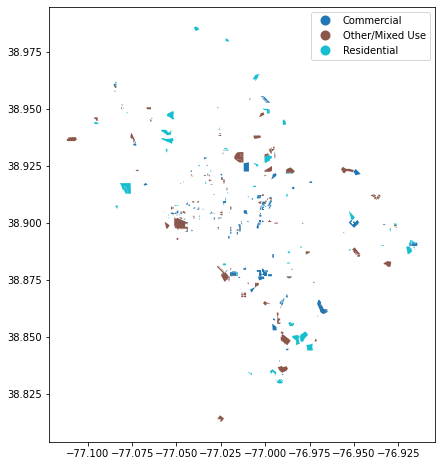

In [53]:
puds_info.plot(column='Zone_Cat', legend=True, figsize=(16,8));

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


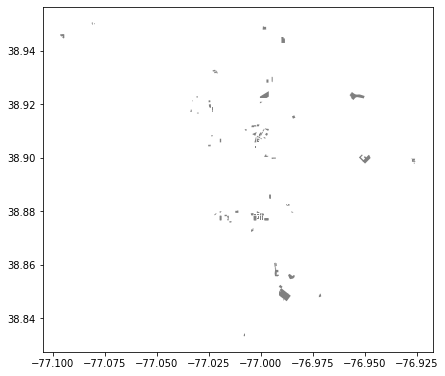

In [54]:
# Create a map of just the PUDs that provide Affordable Housing

puds_info[puds_info['TOTAL_AFFORDABLE_UNITS']>0].plot(column='TOTAL_AFFORDABLE_UNITS', color='grey', figsize=(16,6.35));